In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pickle

In [2]:
bbc_ft = pd.read_csv('/Users/xinrucheng/Documents/Metis_bootcamp/week_9/metis_passion_project/data/processed/Features.csv')

In [3]:
def cos_sim_vs_all(img_idx, datasetft, num):
    '''Find the pairwise cosine similarity between features of the chosen image and all the images in the dataset
    Takes in index of image and a dataset of image features previously extracted from CNN
    Returns a sorted array of the top number (num) of most similar images by index, from most similar (except for itself) to least similar'''
    sim_list = []
    imageft = bbc_ft.iloc[img_idx].values.reshape(1, -1)
    for i in range(len(datasetft)):
        cos_sim = cosine_similarity(imageft, datasetft.iloc[i].values.reshape(1,-1)) 
        sim_list.append(cos_sim)
        sim_array = np.array(sim_list).argsort(axis=None)
        #flip to sort from largest cos sim values (most similar) to smallest
        sim_sorted = np.flipud(sim_array)[1:num+1]
    return sim_sorted

In [4]:
#test similar recipes for turkey -- need to replace this index with user input on app!*
turkey_sorted = cos_sim_vs_all(1412, bbc_ft, 11)

In [5]:
bbc_path='/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/'
#better way to do this?

In [6]:
bbc_list = !ls /Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos

In [ ]:
# #bbclist = !ls doesn't work outside of jupyter, for loop fos vscode?
def get_names_list(directory):
    '''stores all image names in directory into a list'''
    names_lst = []
    for entry in os.scandir(directory): #loop through files in directory, path is file path of folder containing images
        if entry.path.endswith(".jpg"):
        #if entry.path == directory + '/.DS_Store':
        #    continue  #avoid reading mac os's .DS_Store as an image
        #else:
            names_lst.append(entry.path) #"name" is entire path; if append entry: <DirEntry 'zesty_tofu_cheesecake_84103_16x9.jpg'> (type?)
    return names_lst

In [7]:
len(bbc_list)

2225

In [8]:
#if need to return text predictions separately from image
def print_similar_names(sorted_array):
    similar_list = []
    for idx in sorted_array:
        similar_list.append(bbc_list[idx])
        #print(bbc_list[idx])
    return similar_list
print_similar_names(turkey_sorted) 
#clean up path to display name only? use regex?

# def print_similar_imgs(sorted_array, num):        
#     for idx in sorted_array[:num]:
#         print(bbc_list[idx])
#         img=mpimg.imread(bbc_list[idx]) 
#         #imgplot = plt.imshow(img) #unused var?
#         plt.show(img) #change and save img/display on webpage?
# print_similar_imgs(turkey_sorted,5) 

['the_perfect_roast_turkey_01155_16x9.jpg',
 'turkey_crown_with_orange_47645_16x9.jpg',
 'yorkshirepuddings_86010_16x9.jpg',
 'whole_roasted_masala_77631_16x9.jpg',
 'roast_goose_with_apples_74479_16x9.jpg',
 'sun-dried_tomato_and_97049_16x9.jpg',
 'slow_cooker_beef_brisket_98634_16x9.jpg',
 'theperfectbakedpotat_67837_16x9.jpg',
 'roastbellyofporkwith_73882_16x9.jpg',
 'stuffedchickenbreast_72067_16x9.jpg',
 'scones_with_jam_and_10035_16x9.jpg']

In [ ]:
#pickle?

!mkdir -p predictor

In [ ]:
import pickle

with open("predictor/cossim.pkl", "wb") as f:
    pickle.dump(lr_model, f)

In [ ]:

with open("predictor/lr.pkl", "rb") as f:
    lr_model2 = pickle.load(f)

-----------
For Flask: 

Combine into one giant ftn that reads in .csv and outputs top 5 recommended titles! (connect to pictures in api.py?)

In [53]:
def ft_to_rec(img_idx):
    '''Function that takes in an image index in dataset, 
    compares its cosine similarity with the rest of the images in dataset,
    generates a list of the top 5 recommendations and their images'''
    #next stage - need separate pkl file to extract image features before getting index?
    
    #find feature of selected image in previously extracted features.csv file
    sim_list = []
    bbc_ft = pd.read_csv('/Users/xinrucheng/Documents/Metis_bootcamp/week_9/metis_passion_project/data/processed/Features.csv')
    imageft = bbc_ft.iloc[img_idx].values.reshape(1, -1)
    
    
    #Find cosine similarity between selected image and the rest of the dataset, sort from highest to lowest similarity,
    #omit the image itself in the result
    for i in range(len(bbc_ft)):
        cos_sim = cosine_similarity(imageft, bbc_ft.iloc[i].values.reshape(1,-1)) 
        sim_list.append(cos_sim)
        sim_array = np.array(sim_list).argsort(axis=None)
        #flip to sort from largest cos sim values (most similar) to smallest
        sim_sorted = np.flipud(sim_array)[1:5+1] #num=5, hardcoded
    #return sim_sorted
    
    
    bbc_path='/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/'
    #better way to do this?
    
    #Stores all image names in directory into a list - same as bbc_list = !ls... in jupyter - cmd line doesn't work in py?
    img_list = []
    for entry in os.scandir(bbc_path): #loop through files in directory, path is file path of folder containing images
        if entry.path.endswith(".jpg"):
        #if entry.path == directory + '/.DS_Store':
        #    continue  #avoid reading mac os's .DS_Store as an image
        #else:
            img_list.append(entry.path)
    #return names_lst        
            
    import pprint
    names_list = []
    for idx in sim_sorted:
        names_list.append(img_list[idx])
        #print(bbc_list[idx])
    pprint.pprint(names_list)
    
    #Prints out top 5 most similar images
    #def print_similar_imgs(sorted_array):        
    #for file in sim_sorted[:5]: #top 5, can change to input arg num
        #print(bbc_list[idx])
    testimglist = []
    for filename in names_list:
        img=mpimg.imread(filename) 
        imgplot = plt.imshow(img) #unused var?
        #plt.show(img) #get truth value ambiguous error (even though no == in my ftn) with this line, without, prints last img
        #change and save img/display on webpage?
        
        testimglist.append(imgplot)
        print(testimglist) #have the 5 matplotlib object in list, but not printing them?
    return testimglist
    

['/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/the_perfect_roast_turkey_01155_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/turkey_crown_with_orange_47645_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/yorkshirepuddings_86010_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/whole_roasted_masala_77631_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/roast_goose_with_apples_74479_16x9.jpg']
[<matplotlib.image.AxesImage object at 0x12597b908>, <matplotlib.image.AxesImage object at 0x12597bd68>]
[<matplotlib.image.AxesImage object at 0x12597b908>, <matplotlib.image.AxesImage object at 0x12597bd68>, <matplotlib.image.AxesImage

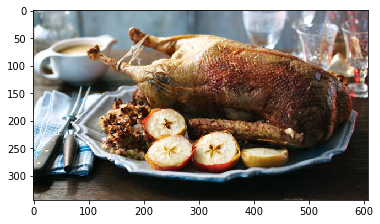

In [54]:
output_list = ft_to_rec(1412) #15s for calculating and printing name_list

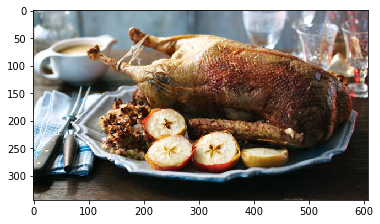

In [46]:
name_l=['/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/the_perfect_roast_turkey_01155_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/turkey_crown_with_orange_47645_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/yorkshirepuddings_86010_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/whole_roasted_masala_77631_16x9.jpg',
 '/Users/xinrucheng/Documents/Metis_bootcamp/week_9/project5data/2017_140k/recipe_photos/bbc_photos/pages-photos/roast_goose_with_apples_74479_16x9.jpg']

for filename in name_l:
    img=mpimg.imread(filename) 
    images = plt.imshow(img) #unused var?
#plt.show(img)   
#    imgplot = plt.imshow(img)
#    imgplot #only shows last one?
    
    
    #plt.show(img)
    #ipykernel/pylab/backend_inline.py  in show; only first image? -- numpy 1.1.13 issue? Github issue numpy #24
    #ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# def get_names_list(directory):
#     '''stores all image names in directory into a list'''
#     names_lst = []
#     for entry in os.scandir(directory): #loop through files in directory, path is file path of folder containing images
#         if entry.path.endswith(".jpg"):
#         #if entry.path == directory + '/.DS_Store':
#         #    continue  #avoid reading mac os's .DS_Store as an image
#         #else:
#             names_lst.append(entry.path) #"name" is entire path; if append entry: <DirEntry 'zesty_tofu_cheesecake_84103_16x9.jpg'> (type?)
#     return names_lst


# def print_similar_names(sorted_array):
#     similar_list = []
#     for idx in sorted_array:
#         similar_list.append(bbc_list[idx])
#         #print(bbc_list[idx])
#     return similar_list
# print_similar_names(turkey_sorted) 
#clean up path to display name only? use regex?

# def print_similar_imgs(sorted_array, num):        
#     for idx in sorted_array[:num]:
#         print(bbc_list[idx])
#         img=mpimg.imread(bbc_list[idx]) 
#         #imgplot = plt.imshow(img) #unused var?
#         plt.show(img) #change and save img/display on webpage?
# print_similar_imgs(turkey_sorted,5) 